In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_variables = pd.read_csv('resources/life_expect_merged.csv')
all_variables.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,current_amount,pocket_health_spend
0,0,afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.723571e+10,NaN
1,1,afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.433371e+10,NaN
2,2,afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1.969910e+10,NaN
3,3,afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2.320439e+10,NaN
4,4,afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2.486661e+10,NaN


In [2]:
all_variables = pd.read_csv('resources/all_data.csv')
all_variables.head()

,Unnamed: 0,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,hepatitisb,...,fdi,birth_per_woman,water,math4,gini,out_of_pocket_share,aid_perperson,poverty,electricity,cellphone
0,0,algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,...,1.249631,2.66,91.7,378.0,NaN,21.5,11.561165,NaN,532.0,27562721.0
1,1,algeria,2006,Developing,73.4,132.0,20,0.36,270.240196,8.0,...,1.573088,2.58,91.4,NaN,NaN,24.3,7.154365,NaN,504.0,20997954.0
2,2,algeria,2005,Developing,72.9,136.0,19,0.50,2.548923,83.0,...,1.120172,2.50,91.2,NaN,NaN,26.4,10.479122,NaN,533.0,13661355.0
3,3,algeria,2004,Developing,72.3,14.0,19,0.45,220.393699,81.0,...,1.033522,2.44,90.9,NaN,NaN,27.4,9.695596,NaN,466.0,4882414.0
4,4,algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,...,0.939909,2.41,90.7,NaN,NaN,20.3,7.415040,NaN,452.0,1446927.0


In [6]:
#select only variables to be used in model
cols = ['lifeexpectancy', 'status','percentageexpenditure', 'gdp', 'incomecompositionofresources',\
        'schooling', 'fdi', 'birth_per_woman', 'water', \
        'out_of_pocket_share', 'electricity', 'cellphone']

model_vars = all_variables[cols].copy()

#transform categorical variable into numerical using get dummies
model_vars = pd.get_dummies(model_vars, columns=["status"])

#drop one of the dummy variables
model_vars = model_vars.drop(columns=['status_Developing'])

#drop rows with NaNs
model_vars.dropna(how='any', inplace=True)

model_vars.head()

,lifeexpectancy,percentageexpenditure,gdp,incomecompositionofresources,schooling,fdi,birth_per_woman,water,out_of_pocket_share,electricity,cellphone,status_Developed
0,73.8,320.323924,3935.183343,0.690,12.3,1.249631,2.66,91.7,21.5,532.0,27562721.0,0
1,73.4,270.240196,3464.617900,0.686,12.3,1.573088,2.58,91.4,24.3,504.0,20997954.0,0
2,72.9,2.548923,31.122378,0.680,12.0,1.120172,2.50,91.2,26.4,533.0,13661355.0,0
3,72.3,220.393699,2598.982300,0.673,11.7,1.033522,2.44,90.9,27.4,466.0,4882414.0,0
4,71.7,25.018523,294.335560,0.663,11.5,0.939909,2.41,90.7,20.3,452.0,1446927.0,0


In [7]:
model_vars.count()

lifeexpectancy                  144
percentageexpenditure           144
gdp                             144
incomecompositionofresources    144
schooling                       144
fdi                             144
birth_per_woman                 144
water                           144
out_of_pocket_share             144
electricity                     144
cellphone                       144
status_Developed                144
dtype: int64

# Random Forest

In [4]:
#declare x and y variables
X = model_vars[['Status_Developed','percentage expenditure', 'GDP', 'Schooling', 'pocket_health_spend', 'Income composition of resources']]
y = model_vars['Life expectancy']
print(X.shape, y.shape)

(1293, 6) (1293,)


In [5]:
#split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
#use a random forest regressor model. Fit the model with the train data.
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)

#Score the model with the test data
rf.score(X_test, y_test)

0.8958299455078714

In [13]:
#Display the feature importance of each x variable
feature_names = X.columns
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

features

[(0.7995827026050879, 'Income composition of resources'),
 (0.062021216725901045, 'pocket_health_spend'),
 (0.056368703504006225, 'GDP'),
 (0.04698818522227556, 'Schooling'),
 (0.03462228906537044, 'percentage expenditure'),
 (0.00041690287735879556, 'Status_Developed')]

In [24]:
#create a dataframe of the feature importances
feature_df = pd.DataFrame.from_records(features, columns =['feature_importance', 'variables']) 
feature_df.sort_values('feature_importance',inplace=True)

feature_df

,feature_importance,variables
5,0.000417,Status_Developed
4,0.034622,percentage expenditure
3,0.046988,Schooling
2,0.056369,GDP
1,0.062021,pocket_health_spend
0,0.799583,Income composition of resources


In [18]:
plt.barh(feature_df)

TypeError: barh() missing 1 required positional argument: 'width'

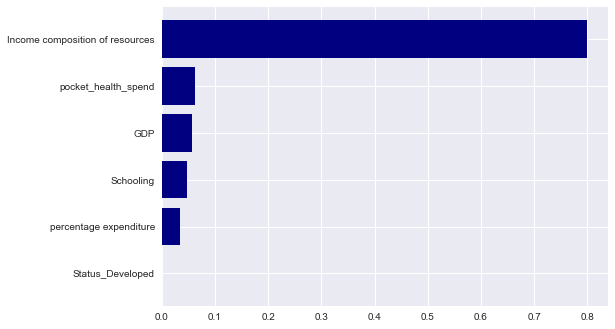

In [33]:
ax = plt.subplot(1,1,1)
ax.barh(feature_df['variables'], feature_df['feature_importance'], color='navy' )
plt.style.use('seaborn')
plt.show()